In [26]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [27]:
ticker = 'BTC-USD'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-7-6')['Adj Close']

log_returns = np.log(1+ data.pct_change())

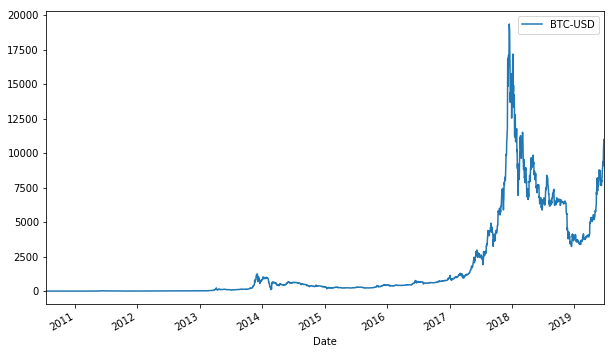

In [28]:
data.plot(figsize=(10,6));

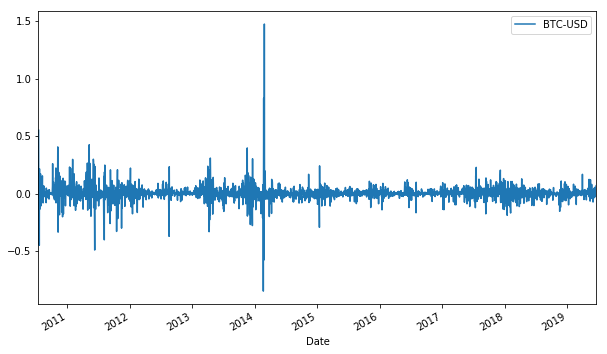

In [29]:
log_returns.plot(figsize=(10,6))

In [30]:
u = log_returns.mean()
var = log_returns.var()

$$
drift = u - \frac{1}{2} \cdot var
$$

In [31]:
drift = u - (0.5 * var)
stdev = log_returns.std()

In [32]:
np.array(drift)

array([0.00151823])

In [33]:
drift.values

array([0.00151823])

In [34]:
stdev.values

array([0.06715829])

In [35]:
norm.ppf(0.95)

1.6448536269514722

In [36]:
x = np.random.rand(10, 2)
x

array([[0.57825778, 0.4591655 ],
       [0.22900781, 0.42556942],
       [0.60165376, 0.9466207 ],
       [0.25049489, 0.540619  ],
       [0.93215472, 0.85551316],
       [0.70797072, 0.9340928 ],
       [0.67601236, 0.27417648],
       [0.28774609, 0.17613618],
       [0.61444405, 0.11460214],
       [0.56164043, 0.92139921]])

In [37]:
norm.ppf(x)

array([[ 0.19743846, -0.10253631],
       [-0.74211838, -0.18766555],
       [ 0.25763   ,  1.61293515],
       [-0.67293321,  0.1019933 ],
       [ 1.49203277,  1.06037576],
       [ 0.54746609,  1.50698537],
       [ 0.45657676, -0.60023001],
       [-0.55998132, -0.93019068],
       [ 0.2909208 , -1.20241113],
       [ 0.1551296 ,  1.41454623]])

In [38]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.20702241, -0.87682843],
       [ 0.51100817, -1.50278071],
       [ 1.51164104, -2.00742506],
       [ 0.61052011,  1.06455896],
       [-0.14402407, -0.78753305],
       [ 1.05680207,  1.4828576 ],
       [ 0.34642598, -0.39731529],
       [ 0.31972073,  0.37278616],
       [-1.22735442,  1.25686291],
       [ 0.52543831, -0.33179287]])

In [60]:
t_intervals = 500
iterations = 5

$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$

In [61]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.93188283, 0.94595158, 0.99706287, 0.9170519 , 1.15557299],
       [1.0154174 , 1.03117584, 0.95901348, 1.02496157, 0.96958216],
       [0.9673088 , 1.01350098, 1.03876894, 1.06004238, 1.01557597],
       ...,
       [1.04416917, 1.19310729, 0.86570791, 0.90367263, 1.03567671],
       [0.9884654 , 1.09591086, 0.9254452 , 0.97898125, 1.02487313],
       [1.07439561, 1.03312098, 1.04080176, 1.0322788 , 1.01233685]])

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$


In [62]:
S0 = data.iloc[-1]
S0

BTC-USD    10971.799805
Name: 2019-06-22 00:00:00, dtype: float64

In [63]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [64]:
price_list[0] = S0
price_list

array([[10971.79980469, 10971.79980469, 10971.79980469, 10971.79980469,
        10971.79980469],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ],
       ...,
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ]])

In [65]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [66]:
price_list

array([[ 10971.79980469,  10971.79980469,  10971.79980469,
         10971.79980469,  10971.79980469],
       [ 11140.95641399,  11313.85493468,  10522.10396186,
         11245.6732061 ,  10638.06130927],
       [ 10776.74512626,  11466.60307674,  10930.03479873,
         11920.89013986,  10803.75938362],
       ...,
       [ 16903.07925858,   8251.68177709, 112877.37950455,
         63977.81208158,  84736.39911271],
       [ 16708.10895023,   9043.1076644 , 104461.82945496,
         62633.07874316,  86844.05887076],
       [ 17951.11896097,   9342.62426487, 108724.05575377,
         64654.79962399,  87915.44087941]])

In [46]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [67]:
df = pd.DataFrame(data = price_list)

In [68]:
df.head()

,0,1,2,3,4
0,10971.799805,10971.799805,10971.799805,10971.799805,10971.799805
1,11140.956414,11313.854935,10522.103962,11245.673206,10638.061309
2,10776.745126,11466.603077,10930.034799,11920.890140,10803.759384
3,9284.920659,11580.040945,11244.718091,13102.765952,11871.455346
4,8489.979471,10108.010740,10001.195762,12169.838324,11755.082652


In [72]:
df.iplot()